# Apprentissage supervisé - Classification

## 1. Préparation des données

### 1.1. Téléchargement de données

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator

In [3]:
# Stockage de la base de données
mnist = fetch_openml('mnist_784', version=1)

### 1.2. Information sur les données

In [4]:
# Affichage des clefs du dictionnaire
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
# Affichage des features
print(f"La taille des données est une matrice de taille {mnist['data'].shape}.")

# Stockage des features dans une variable X
X = mnist['data']

# Affichage des premières lignes de données
print(f"{X[:5]}")

La taille des données est une matrice de taille (70000, 784).
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
# Affichage des targets
print(f"La taille des labels est une matrice de taille {mnist['target'].shape}.")

# Stockage des target dans une variable y
y = mnist['target']

# Redimensionnement de la matrice
#y = y.reshape(-1,1)

La taille des labels est une matrice de taille (70000,).


In [7]:
# Affichage des différentes classes de la base de données
print(f' Voici les {len(np.unique(y))} classes de la base de données : {", ".join(np.unique(y))}')

 Voici les 10 classes de la base de données : 0, 1, 2, 3, 4, 5, 6, 7, 8, 9


In [8]:
# Affichage de la description détaillée de la base de données
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

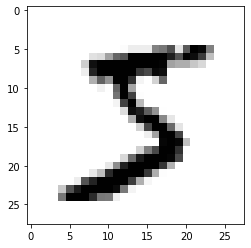

In [9]:
# Affichage de l'image de la première instance de la bdd
first_img = X[0,:].reshape(28,28)
plt.imshow(first_img, cmap=plt.cm.gray_r)

In [10]:
# Affichage de la classe de la première instance
first_cls = y[0]
print(first_cls)

5


In [11]:
# Affichage du type des labels
type(y[0])

str

In [12]:
# Transformation des labels
y = y.astype(np.uint8)

### 1.3. Répartition des données

In [13]:
# Division des données en jeu d'apprentissage et de test
X_train, y_train = X[:60000,:], y[:60000]
X_test, y_test = X[60000:,:], y[60000:]

## 2. Apprentissage d'un classifieur binaire

### 2.1. Apprentissage des données

In [14]:
# Classification binaire avec deux matrices booléennes
bool_train = y_train == 5
bool_test = y_test == 5

In [15]:
# Utilisation du Stochastic Gradient Descent (SGD)
sgd_model = SGDClassifier(loss="hinge", max_iter=5)
# Adaptation avec notre jeu d'entraînement
sgd_model.fit(X_train, bool_train)

SGDClassifier(max_iter=5)

In [16]:
sgd_model.score(X_test, bool_test)

0.9562

### 2.2. Evaluation du modèle d'apprentissage sur les données d'apprentissage

#### 2.2.1. Taux de classification

In [17]:
# Répartition des données en base d'apprentissage et de validation
scores = cross_val_score(sgd_model, X_train, bool_train, cv=3, scoring="accuracy")

In [18]:
# Affichage du taux de classification de chaque fold
print(f"Résultats de la validation croisée: {scores}")

# Affichage de la moyenne des taux de classification
print(f"Moyenne des taux de classification: {scores.mean()}")

Résultats de la validation croisée: [0.96405 0.9602  0.9634 ]
Moyenne des taux de classification: 0.9625499999999999


In [19]:
# Création de la classe et ajout des deux méthodes
class Never5Classifier (BaseEstimator):

    def fit(self, data, labels):
        pass

    def predict(self, data):
        return np.zeros((len(data),1) ,dtype=bool)

In [20]:
# Création d'un objet de la classe Never5Classifier
cls_5 = Never5Classifier()

In [21]:
# Test du classifier
scores_clas_5 = cross_val_score(cls_5, X_train, bool_train, cv=3, scoring="accuracy")

In [22]:
# Affichage du taux de classification de chaque fold
print(f"Résultats de la validation croisée: {scores_clas_5}")

# Affichage de la moyenne des taux de classification
print(f"Moyenne des taux de classification: {scores_clas_5.mean()}")

Résultats de la validation croisée: [0.91125 0.90855 0.90915]
Moyenne des taux de classification: 0.90965


#### 2.2.2. Matrice de confusion

In [23]:
# Création de la cross val predict
cross_pred = cross_val_predict(sgd_model, X_train, bool_train, cv=3)

In [24]:
# Affichage de la matrice de confusion
tn, fp, fn, tp = confusion_matrix(cross_pred, bool_train).ravel()

print(f'Il y a {tn} de TN (True negative)')
print(f'Il y a {fp} de FP (False positive)')
print(f'Il y a {fn} de FN (False negative)')
print(f'Il y a {tp} de TP (True positive)')

Il y a 51238 de TN (True negative)
Il y a 707 de FP (False positive)
Il y a 3341 de FN (False negative)
Il y a 4714 de TP (True positive)


Le modèle produit assez peu de `False positive` et de `False negative` ce qui indique qu'il est assez performant et arrive plutôt bien à classer les données.

#### 2.2.3. Précision et rappel

In [25]:
# Calcul de la précision (TP / (TP + FP)), 
# du rappel (TP / (TP + FN))
# et du score F1 (2 * (precision * recall) / (precision + recall))
print(classification_report(cross_pred, bool_train))

              precision    recall  f1-score   support

       False       0.94      0.99      0.96     51945
        True       0.87      0.59      0.70      8055

    accuracy                           0.93     60000
   macro avg       0.90      0.79      0.83     60000
weighted avg       0.93      0.93      0.93     60000



In [26]:
# Utilisation de la cross_val_predict avec la méthode 'decision_function'
cross_pred_decision_func = cross_val_predict(sgd_model, X_train, bool_train, cv=3, method='decision_function')

In [27]:
# Affichage des scores
print(f"Scores obtenus: \n{cross_pred_decision_func} \n")
# Longueur totale des scores obtenus
print(f"Longueur totale des scores obtenus: {len(cross_pred_decision_func)} valeurs")

Scores obtenus: 
[  75534.34743665 -568493.38404458 -675145.10868002 ...  155110.94996078
 -401736.79555038 -324713.27802044] 

Longueur totale des scores obtenus: 60000 valeurs


In [28]:
# Calcul des précisions et des rappels de chaque instance
precision, recall, tresholds = precision_recall_curve(bool_train, cross_pred_decision_func)

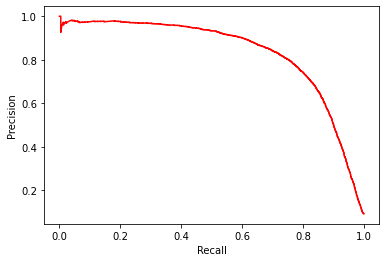

In [29]:
# Affichage de la courbe des rappels en fonction des précisions
plt.plot(recall, precision, c='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

#### 2.2.4. Courbe ROC

In [30]:
# Calcul des deux taux
fpr, tpr, tresholds = roc_curve(bool_train, cross_pred_decision_func)

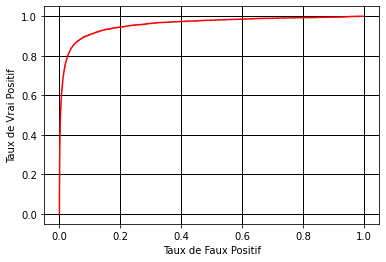

In [31]:
# Courbe des ROC
plt.plot(fpr, tpr, c='red')
plt.grid(color='black', linestyle='-', linewidth=1)
plt.xlabel('Taux de Faux Positif')
plt.ylabel('Taux de Vrai Positif')
plt.show()

In [32]:
# Calcul de l'AUC
roc_score = roc_auc_score(bool_train, cross_pred_decision_func)

print(f"Le score AUC est de: {roc_score}")

Le score AUC est de: 0.959767708794036


## 3. Apprentissage d'un classifieur multi-classes

### 3.1. Apprentissage des données

In [33]:
# Apprentissage du modèle sur l'ensemble de la base de données
sgd_model.fit(X_train, y_train)

SGDClassifier(max_iter=5)

In [34]:
# Score de prédiction du modèle
sgd_model.score(X_test, y_test)

0.8548

In [35]:
# Prediction du modèle sur la première image qui est un 5
first_img_pred = sgd_model.predict(X[0,:].reshape(1, -1))
print(f"Le modèle prédit que la première image est un: {first_img_pred[0]}")

Le modèle prédit que la première image est un: 3


In [36]:
# Affichage des 10 scores de décisions
print(f"Voici les 10 scores de décisions de la méthode SGD:\n \n {sgd_model.decision_function(X[0,:].reshape(1, -1))}.")

Voici les 10 scores de décisions de la méthode SGD:
 
 [[-449725.99263731 -492653.98359085 -484715.59192155  183782.15038159
  -660480.86553375     775.10804154 -463741.77826859 -522422.39753909
  -463971.26980869 -560848.5442249 ]].


In [37]:
# Affichage des différentes classes utilisées par le classifier
print(f'Voici les classes utilisées par le classifier: {sgd_model.classes_}.')

Voici les classes utilisées par le classifier: [0 1 2 3 4 5 6 7 8 9].


On remarque que toutes les classes se retrouvent dans la même ligne de la matrice, elles ne sont plus séparées et il n'y a pas de doublons.

### 3.2. Evaluation du modèle d'apprentissage sur les données d'apprentissage

#### 3.2.1. Taux de classification

In [38]:
# Répartition des données en deux bases d'apprentissage et de validation
scores_all_cls = cross_val_score(sgd_model, X_train, y_train, cv=3, scoring="accuracy")

In [39]:
print(f"Voici le taux d'accuracy de chaque fold: {scores_all_cls} .\n")
print(f"La moyenne des taux de classification est de: {scores_all_cls.mean()} .")

Voici le taux d'accuracy de chaque fold: [0.84285 0.86355 0.866  ] .

La moyenne des taux de classification est de: 0.8574666666666667 .


In [40]:
X_train.shape

(60000, 784)

In [41]:
# Standardisation des jeu de données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [42]:
# Evaluation du modèle après Standardisation
scores_all_cls_std = cross_val_score(sgd_model, X_train, y_train, cv=3, scoring="accuracy")
print(f"Voici le taux d'accuracy de chaque fold: {scores_all_cls_std} .\n")
print(f"La moyenne des taux de classification est de: {scores_all_cls_std.mean()} .")

Voici le taux d'accuracy de chaque fold: [0.90715 0.90765 0.91035] .

La moyenne des taux de classification est de: 0.9083833333333334 .


La moyenne des taux de classification est bien meilleure après la `Standardisation`.   
Elle est passée de `0.85` à `0.91` (arrondi au centième près).  
On peut donc dire que la `Standardisation` des données d'entraînement à permis d'obtenir un modèle plus fiable.

#### 3.2.2. Matrice de Confusion

In [43]:
# Prédiction des classes des données d'apprentissage
cross_pred_multi = cross_val_predict(sgd_model, X_train, y_train, cv=3)

In [44]:
# Affichage de la matrice de confusion pour chaque classe
conf = confusion_matrix(cross_pred_multi, y_train)
print(f"Ceci est la matrice de confusion du modèle d'apprentissage:\n \n {conf}")

Ceci est la matrice de confusion du modèle d'apprentissage:
 
 [[5730    1   54   50   16   76   35   25   53   45]
 [   2 6492   40   44   26   41   23   23  157   35]
 [  28   40 5325  149   31   44   41   73   75   28]
 [   8   28  105 5326    8  187    2   28  158   86]
 [  11    8   86    2 5345   81   43   52   17  166]
 [  42   36   24  227   10 4571   89   10  146   35]
 [  47    7   88   34   57  111 5635    4   50    2]
 [   9   11   61   59   33   26    5 5806   25  210]
 [  43  108  162  146  102  190   45   18 5055   90]
 [   3   11   13   94  214   94    0  226  115 5252]]


Chaque ligne de la matrice correspond à la classification des images en fonction des labels `0`, `1`, `2`, `3`, `4`, `5`, `6`, `7`, `8`, `9`.  

Par exemple, sur la première ligne on peut voir que lorsqu'il s'agit d'une image représentant `0`, le modèle classe:  
- `5730` images en tant que `0`
- `1` image en tant que `1`
- `54` images en tant que `2`
- `50` images en tant que `3`
- `16` images en tant que `4`
- `76` images en tant que `5`
- `35` images en tant que `6`
- `25` images en tant que `7`
- `53` images en tant que `8`
- `45` images en tant que `9`

Et ainsi de suite pour chaque label.   
Sur la ligne d'après il y a donc la classification des images des `1`, puis des `2`, puis des `3`, etc.

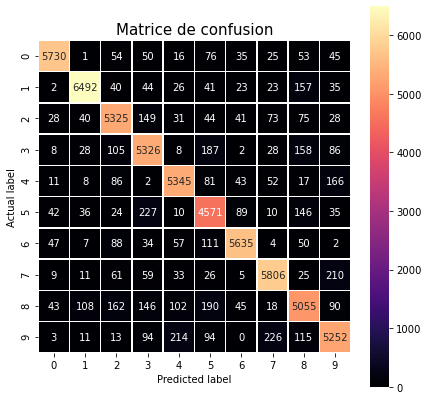

In [53]:
# Heatmap de la visualisation de la matrice de confusion
plt.figure(figsize=(7,7))
sns.heatmap(conf, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'magma')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size = 15)
plt.show()